In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input, Lambda, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.layers.normalization import BatchNormalization

from keras import backend as K
from keras.engine.topology import Layer
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils

from utils import *


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train=X_train.astype(np.float32)
X_test=X_test.astype(np.float32)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
X_train /= 255
X_test /= 255
X_train=2*X_train-1
X_test=2*X_test-1


print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

batch_size=100
lr=0.001
Training=True
Compressing=False

def get_model():
	batch_norm_alpha=0.9
	batch_norm_eps=1e-4

	model=Sequential()

	model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid',input_shape=[32,32,3]))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

	model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

	model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	#model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

	model.add(Flatten())

	model.add(Dense(512))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Dense(512))
	model.add(Activation('relu'))
	model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
	model.add(Dense(10))
	model.add(Activation('softmax'))

	return model




model=get_model()
weights_path='pretrained_cifar10.h5'
model.load_weights(weights_path)
opt = keras.optimizers.Adam(lr=0.001,decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
#make sure weights are loaded correctly:
print model.evaluate(X_test,y_test,verbose=0)




/opt/conda/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


170508288/170498071 [==============================] - 22s 0us/step
('X_train shape:', (50000, 32, 32, 3))
(50000, 'train samples')
(10000, 'test samples')
[0.4099401381775737, 0.8994]


In [2]:
print(np.array(model.layers[-8].get_weights()[0]).shape)
print(type(np.array(model.layers[-8].get_weights())))

(256, 512)
<type 'numpy.ndarray'>


In [5]:
weights = np.array(model.layers[-8].get_weights()[0])

k = 256

U,s,V=np.linalg.svd(weights)

A=np.dot(U[:,0:k],np.diag(s[0:k]))

B=V[0:k,:]

In [6]:
# plot of energy
prev = 0
energy = []
for i in s:
    prev += i 
    energy.append(prev)
    

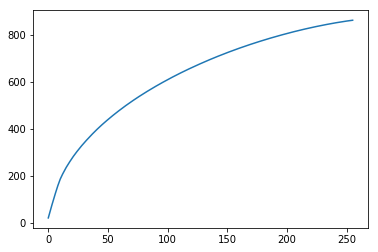

In [8]:
import matplotlib.pyplot as plt

plt.plot(energy)
plt.show()

In [9]:
def get_pca_model(k):
    batch_norm_alpha=0.9
    batch_norm_eps=1e-4

    model=Sequential()

    model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid',input_shape=[32,32,3]))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(Conv2D(filters=128, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    print('True')
    model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(Conv2D(filters=256, kernel_size=3, strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    #model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

    model.add(Flatten())

    model.add(Dense(k))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=-1, momentum=batch_norm_alpha, epsilon=batch_norm_eps))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

In [3]:
K_list= [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]

In [92]:
metrics = []
for k in K_list:
    pca_model = get_pca_model(k)
    for i in range(len(pca_model.layers)):
        if i==21:
            pca_model.layers[i].set_weights([A[:, 0:k], np.zeros(k)])
        elif i==22:
            pca_model.layers[i].set_weights([B[0:k,:], model.layers[i-1].get_weights()[1]])
        else:
            if i<22:
                pca_model.layers[i].set_weights(model.layers[i].get_weights())
            else:
                pca_model.layers[i].set_weights(model.layers[i-1].get_weights())
    pca_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    #make sure weights are loaded correctly:
    temp = pca_model.evaluate(X_test,y_test,verbose=0)
    metrics.append(temp)
    print temp


[1.8299647834777832, 0.4077]
[1.640774785232544, 0.4929]
[1.1167606624603272, 0.6313]
[1.094612429332733, 0.6579]
[0.793471489238739, 0.741]
[0.6678630023956299, 0.7861]
[0.6125033850312233, 0.8263]
[0.43387711187899114, 0.8895]
[0.3995317937597632, 0.8958]
[0.41013973557651046, 0.899]


Text(0.5,0,'k')

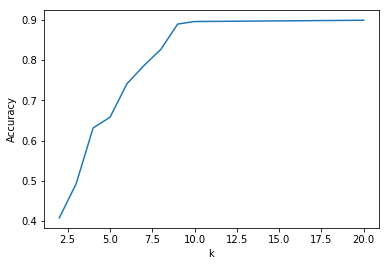

In [25]:
metrics = [[1.8299647834777832, 0.4077],
[1.640774785232544, 0.4929],
[1.1167606624603272, 0.6313],
[1.094612429332733, 0.6579],
[0.793471489238739, 0.741],
[0.6678630023956299, 0.7861],
[0.6125033850312233, 0.8263],
[0.43387711187899114, 0.8895],
[0.3995317937597632, 0.8958],
[0.41013973557651046, 0.899]]

K_list= [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]

u = [metrics[i][1] for i in range(len(metrics))]

plt.plot(K_list, u)

plt.ylabel('Accuracy')
plt.xlabel('k')

In [11]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()
train_metrics = []
k = 0
K_list= [3, 4, 5, 6, 7, 8, 9, 10, 20]
for k in K_list:
    pca_model = get_pca_model(k)
    for i in range(len(pca_model.layers)):
        if i==21:
            pca_model.layers[i].set_weights([A[:, 0:k], np.zeros(k)])
        elif i==22:
            pca_model.layers[i].set_weights([B[0:k,:], model.layers[i-1].get_weights()[1]])
        else:
            if i<22:
                pca_model.layers[i].set_weights(model.layers[i].get_weights())
            else:
                pca_model.layers[i].set_weights(model.layers[i-1].get_weights())
    pca_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    pca_model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
    #make sure weights are loaded correctly:
    temp = pca_model.evaluate(X_test,Y_test,verbose=0)
    train_metrics.append(temp)
    print temp


True
Epoch 1/10
50000/50000 [==============================] - 30s 601us/step - loss: 0.6141 - acc: 0.8017
Epoch 2/10
50000/50000 [==============================] - 28s 566us/step - loss: 0.3239 - acc: 0.8944
Epoch 3/10
50000/50000 [==============================] - 28s 552us/step - loss: 0.2433 - acc: 0.9205
Epoch 4/10
50000/50000 [==============================] - 27s 548us/step - loss: 0.1944 - acc: 0.9380
Epoch 5/10
50000/50000 [==============================] - 28s 570us/step - loss: 0.1588 - acc: 0.9479
Epoch 6/10
50000/50000 [==============================] - 27s 536us/step - loss: 0.1482 - acc: 0.9524
Epoch 7/10
50000/50000 [==============================] - 26s 523us/step - loss: 0.1229 - acc: 0.9609
Epoch 8/10
50000/50000 [==============================] - 26s 522us/step - loss: 0.1166 - acc: 0.9625
Epoch 9/10
50000/50000 [==============================] - 27s 541us/step - loss: 0.1049 - acc: 0.9659
Epoch 10/10
50000/50000 [==============================] - 27s 534us/step - l

50000/50000 [==============================] - 28s 557us/step - loss: 0.0442 - acc: 0.9842
Epoch 9/10
50000/50000 [==============================] - 28s 559us/step - loss: 0.0402 - acc: 0.9868
Epoch 10/10
50000/50000 [==============================] - 28s 558us/step - loss: 0.0416 - acc: 0.9860
[0.5013186994731427, 0.8781]
True
Epoch 1/10
50000/50000 [==============================] - 31s 623us/step - loss: 0.2285 - acc: 0.9250
Epoch 2/10
50000/50000 [==============================] - 27s 547us/step - loss: 0.0853 - acc: 0.9706
Epoch 3/10
50000/50000 [==============================] - 27s 548us/step - loss: 0.0691 - acc: 0.9758
Epoch 4/10
50000/50000 [==============================] - 27s 544us/step - loss: 0.0617 - acc: 0.9789
Epoch 5/10
50000/50000 [==============================] - 28s 559us/step - loss: 0.0543 - acc: 0.9814
Epoch 6/10
50000/50000 [==============================] - 28s 557us/step - loss: 0.0529 - acc: 0.9821
Epoch 7/10
50000/50000 [==============================] - 

[0.8638, 0.8726, 0.8719, 0.8736, 0.8802, 0.8854, 0.8779, 0.8781, 0.8856, 0.8339]


Text(0.5,0,'k')

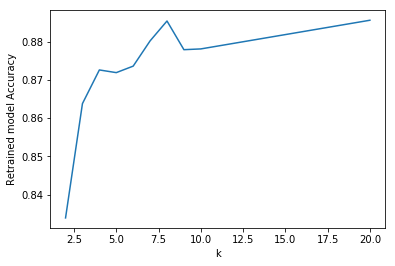

In [21]:
K_list= [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]

t = [0.8339]+[train_metrics[i][1] for i in range(len(train_metrics-1))]

print(t)
#t.append(0.8339)

plt.plot(K_list, t)

plt.ylabel('Retrained model Accuracy')
plt.xlabel('k')

Text(0.5,0,'computational complexity')

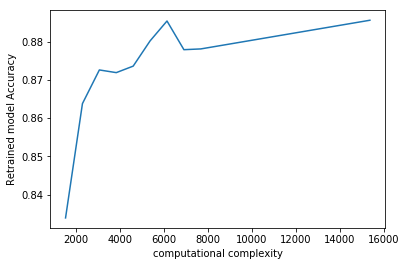

In [23]:
K_list= [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]

K_list = np.array(K_list)*(256+512)

plt.plot(K_list, t)

plt.ylabel('Retrained model Accuracy')
plt.xlabel('computational complexity')

In [ ]:

model.fit(X_train, Y_train, 
          batch_size=32, nb_epoch=10, verbose=1)

In [89]:
pca_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
#make sure weights are loaded correctly:
print pca_model.evaluate(X_test,y_test,verbose=0)

[1.8299647834777832, 0.4077]


In [68]:
print(np.sum(np.array(model.layers[0].get_weights())))

[[[[-0.21850443 -0.19661129 -0.8015845  ...  0.2030479   0.46006626
    -0.14565656]
   [-0.28254363 -0.22654423 -0.5332135  ... -0.21021682  0.522837
    -0.29202121]
   [-0.24363984  0.04696696 -0.5090855  ...  0.01122065  0.42179805
    -0.5619395 ]]

  [[-0.29159713  0.09303226 -0.7662848  ...  0.3105113   0.14536
    -0.14412782]
   [-0.31670815  0.38643542 -0.5755672  ... -0.1842457   0.22713771
    -0.48960602]
   [-0.24075088  0.01640312 -0.49678385 ...  0.18450567  0.22392637
    -0.48417062]]

  [[-0.247562    0.10969153 -0.17736514 ...  0.10021755 -0.11974798
    -0.29254887]
   [-0.14881185  0.63796175 -0.03121901 ... -0.11297259 -0.10083051
    -0.7470124 ]
   [-0.09945101 -0.04572962 -0.18915904 ...  0.27012625 -0.23200361
    -0.7047037 ]]]


 [[[-0.63946104  0.21387923 -0.6127693  ...  0.13142559  0.25181842
    -0.43473256]
   [-0.53057885 -0.03638815 -0.37610638 ... -0.28001803  0.3089897
    -0.51163644]
   [-0.3902824   0.32623202 -0.31317136 ... -0.07531706  0.2883

In [83]:
type(pca_model.layers[21].get_weights())

list

In [85]:
np.zeros(2).shape

(2,)

In [78]:
print(np.array(pca_model.layers[0].get_weights()[0]).shape)


(3, 3, 3, 64)


In [79]:
print(np.array(model.layers[0].get_weights()[0]).shape)

(3, 3, 3, 64)
